<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Les-outils" data-toc-modified-id="Les-outils-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les outils</a></span></li><li><span><a href="#Les-Régressions" data-toc-modified-id="Les-Régressions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Les Régressions</a></span></li></ul></div>

In [3]:
import pandas as pd
from datetime import datetime

import time
import os
os.chdir(r"C:\Solutions\donnees")

import pandas as pd
import seaborn as sns

%pylab inline

plt.style.use('seaborn-poster')
sns.set(font_scale=3)
np.random.seed(123456789)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


In [4]:
donnees = pd.read_csv('jena_climate_2009_2016.csv', sep=',')
donnees.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
donnees.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

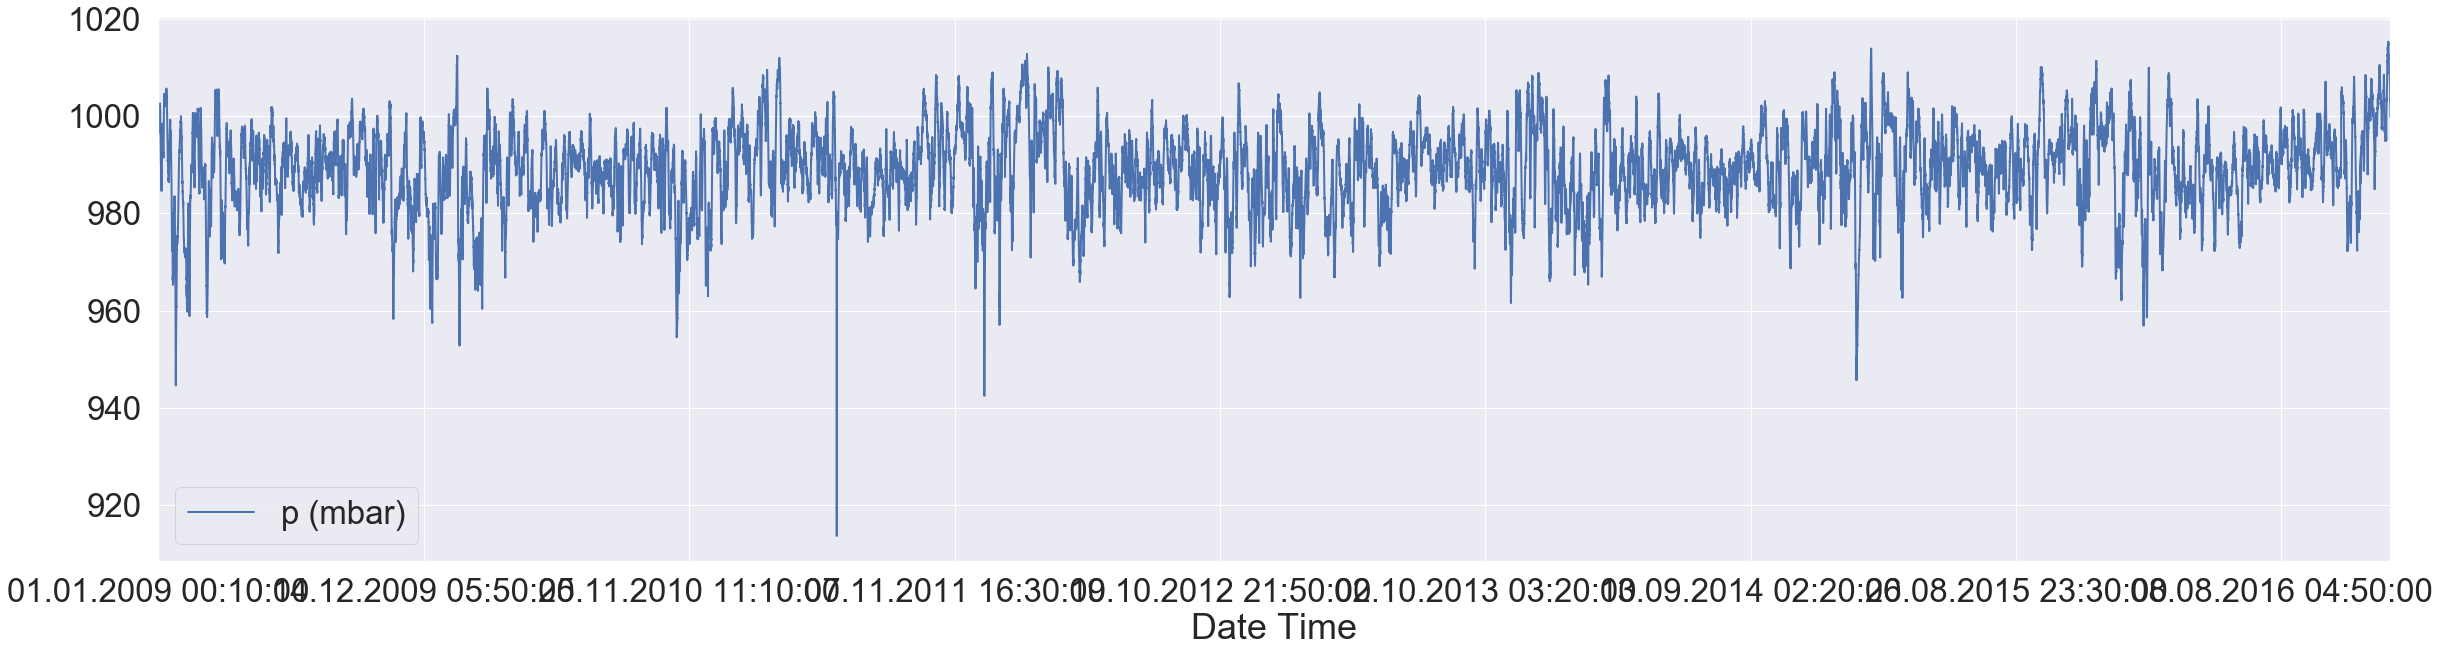

In [6]:
donnees.plot.line(x='Date Time',y='p (mbar)',figsize=(40,10),lw=2);

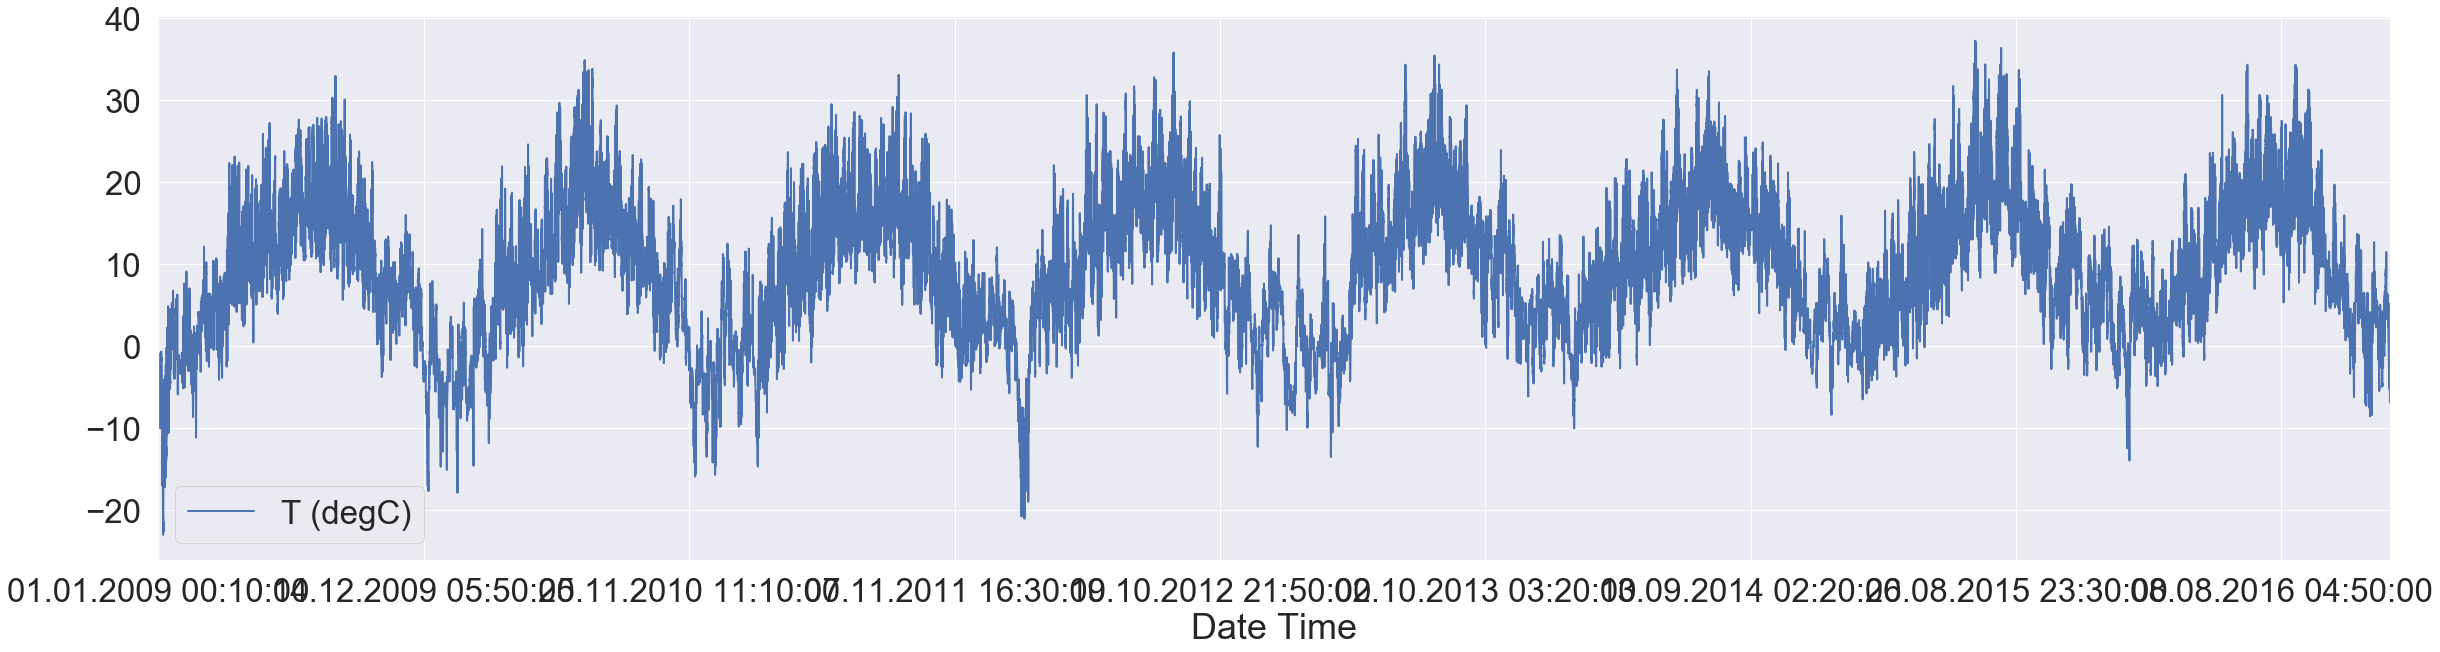

In [7]:
donnees.plot.line(x='Date Time',y='T (degC)',figsize=(40,10),lw=2);

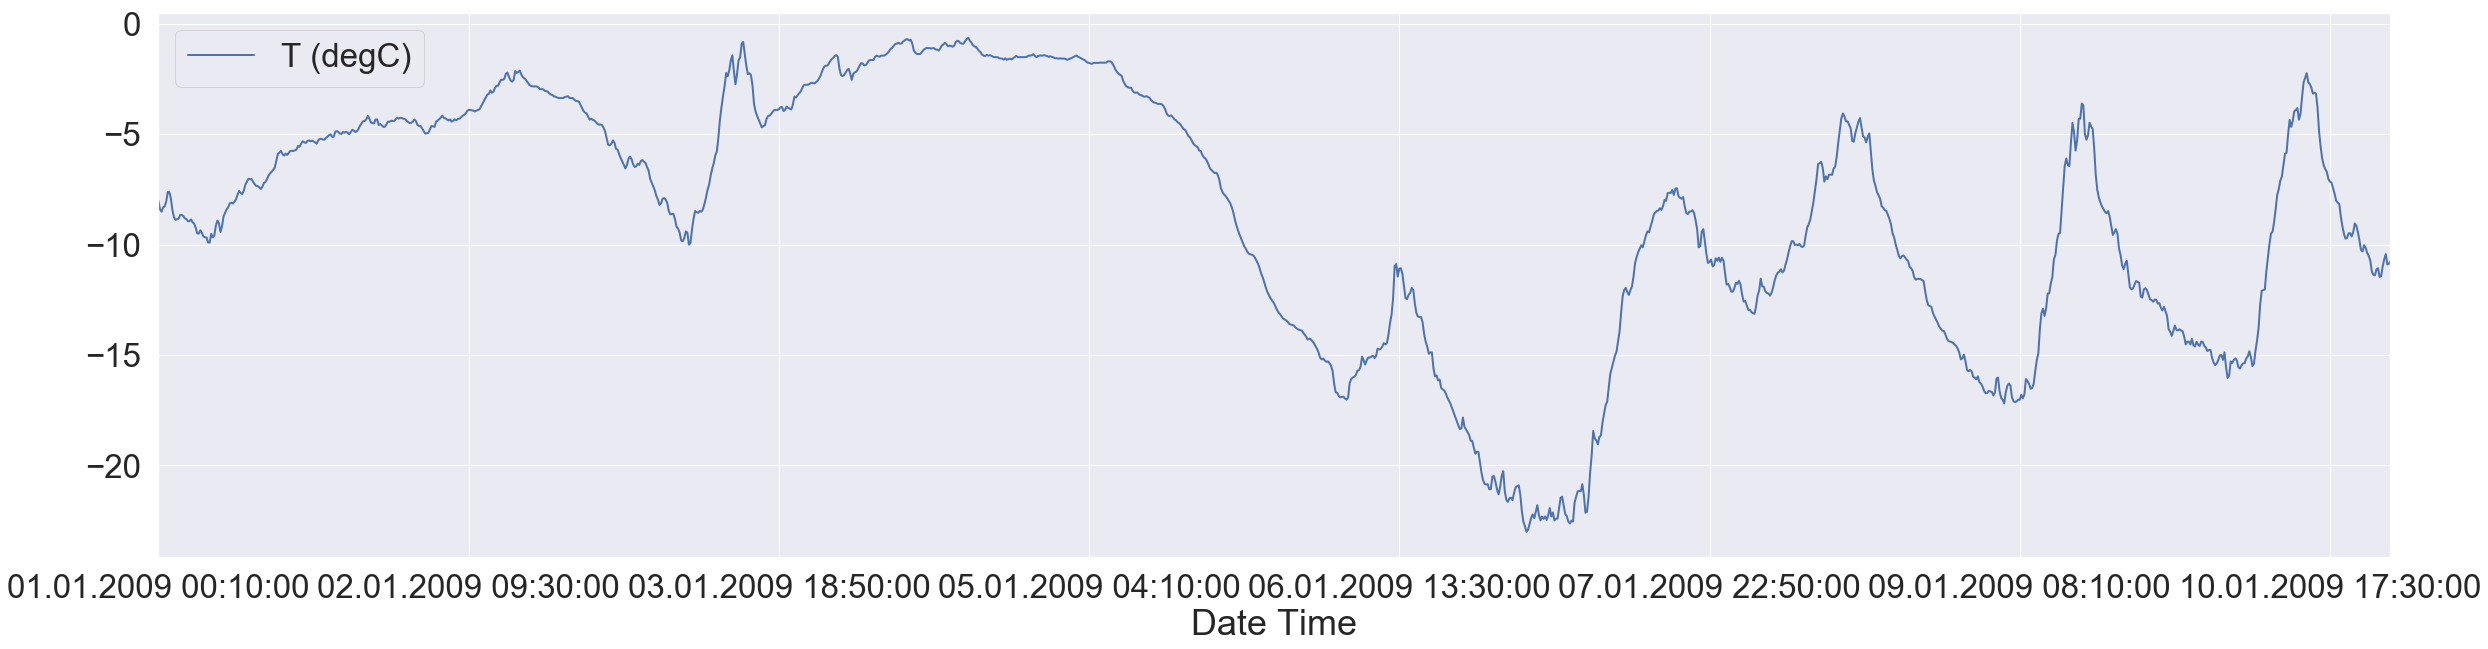

In [8]:
donnees.iloc[:1440,:].plot.line(x='Date Time',y='T (degC)',figsize=(40,10),lw=2);

In [10]:
donnees.set_index('Date Time',inplace=True)
donnees.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [11]:
from sklearn.preprocessing import StandardScaler

modelSS = StandardScaler()
modelSS.fit(donnees.iloc[:200000,:])

donneesSS = pd.DataFrame(modelSS.transform(donnees),columns=donnees.columns,index=donnees.index)

In [12]:
donneesSS.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,0.900147,-1.931358,-1.982110,-1.862800,1.072852,-1.307422,-1.473758,-0.798686,-1.476267,-1.478155,2.123751,-0.729505,-0.780680,-0.276136
01.01.2009 00:20:00,0.906043,-1.975414,-2.025670,-1.915830,1.078831,-1.320427,-1.495196,-0.800752,-1.495025,-1.499321,2.171999,-0.931240,-0.887945,-0.463174
01.01.2009 00:30:00,0.901327,-1.986710,-2.036839,-1.920016,1.108722,-1.323028,-1.497578,-0.802818,-1.498776,-1.501673,2.182354,-1.276143,-1.261228,-0.053306
01.01.2009 00:40:00,0.898968,-1.964118,-2.013384,-1.886524,1.126657,-1.316525,-1.483286,-0.804884,-1.483770,-1.487562,2.157642,-1.178529,-1.317006,0.251497
01.01.2009 00:50:00,0.898968,-1.959599,-2.010033,-1.882337,1.120678,-1.315225,-1.480904,-0.804884,-1.483770,-1.485211,2.153170,-1.191544,-1.261228,0.439690


In [13]:
donneesSS.shape

(420551, 14)

# Les outils

In [14]:
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

def getMetrics(val_reels, val_predites):
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    return sqrt(mean_squared_error(val_reels, val_predites)),sqrt(abs(r2_score(val_reels, val_predites))),correlations.astype(float).corr().valeurs[0]   

In [16]:
def affichageMetricsAvecLog(val_reels, val_predites):
    print("Mean absolute error                 MAE   : %.6f" % mean_absolute_error(val_reels, val_predites))
    print("Median absolute error               MedAE : %.6f" % median_absolute_error(val_reels, val_predites))
    print("Mean squared error                  MSE   : %.6f" % mean_squared_error(val_reels, val_predites))
    print("Mean squared logarithmic error      MSLE  : %.6f" % mean_squared_log_error(val_reels, val_predites))
    print("Root mean squared error             RMSE  : %.6f" % sqrt(mean_squared_error(val_reels, val_predites)))
    print("Root mean squared logarithmic error RMSLE : %.6f" % sqrt(mean_squared_log_error(val_reels, val_predites)))
    print("R² score  raw_values                R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='raw_values'))
    print("R² score  uniform_average           R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='uniform_average'))
    print("R² score  variance_weighted         R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='variance_weighted'))
    print("R  score  raw_values                R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='raw_values'))))
    print("R  score  uniform_average           R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='uniform_average'))))
    print("R  score  variance_weighted         R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='variance_weighted'))))
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    sns.set(font_scale=3)
    plt.figure(figsize=(26,26))
    plt.title('Correlation Pearson des variables', y=1.05, size=38)
    sns.heatmap(correlations.astype(float).corr(),linewidths=0.3,vmax=1.0,fmt ="1.9f", 
                square=True, cmap='coolwarm', linecolor='white', annot=True)
    plt.show()    
    plt.figure(figsize=(26,26))
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.4, s=200, c='black', edgecolors='white')
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.3, 
                s=200+abs(correlations.valeurs - correlations.predictions)*100, c='red', edgecolors='black')
    plt.plot((correlations.valeurs.min(), correlations.valeurs.max()), 
             (correlations.valeurs.min(), correlations.valeurs.max()), c='black', ls="--", alpha=0.6) 
    plt.xlabel('valeurs')
    plt.ylabel('predictions')
    plt.show()    
    
    sns.jointplot(x='valeurs',y='predictions',data=correlations, kind='reg', size=25)

In [17]:
def affichageMetricsSansLog(val_reels, val_predites):
    print("Mean absolute error                 MAE   : %.6f" % mean_absolute_error(val_reels, val_predites))
    print("Median absolute error               MedAE : %.6f" % median_absolute_error(val_reels, val_predites))
    print("Mean squared error                  MSE   : %.6f" % mean_squared_error(val_reels, val_predites))
    #print("Mean squared logarithmic error      MSLE  : %.6f" % mean_squared_log_error(val_reels, val_predites))
    print("Root mean squared error             RMSE  : %.6f" % sqrt(mean_squared_error(val_reels, val_predites)))
    #print("Root mean squared logarithmic error RMSLE : %.6f" % sqrt(mean_squared_log_error(val_reels, val_predites)))
    print("R² score  raw_values                R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='raw_values'))
    print("R² score  uniform_average           R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='uniform_average'))
    print("R² score  variance_weighted         R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='variance_weighted'))
    print("R  score  raw_values                R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='raw_values'))))
    print("R  score  uniform_average           R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='uniform_average'))))
    print("R  score  variance_weighted         R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='variance_weighted'))))
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    sns.set(font_scale=3)
    plt.figure(figsize=(26,26))
    plt.title('Correlation Pearson des variables', y=1.05, size=38)
    sns.heatmap(correlations.astype(float).corr(),linewidths=0.3,vmax=1.0,fmt ="1.9f", 
                square=True, cmap='coolwarm', linecolor='white', annot=True)
    plt.show()    
    plt.figure(figsize=(26,26))
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.4, s=200, c='black', edgecolors='white')
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.3, 
                s=200+abs(correlations.valeurs - correlations.predictions)*100, c='red', edgecolors='black')
    plt.plot((correlations.valeurs.min(), correlations.valeurs.max()), 
             (correlations.valeurs.min(), correlations.valeurs.max()), c='black', ls="--", alpha=0.6) 
    plt.xlabel('valeurs')
    plt.ylabel('predictions')
    plt.show()   
    
    sns.jointplot(x='valeurs',y='predictions',data=correlations, kind='reg', size=25)

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.figure(figsize=(26,26))    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)     

In [19]:
def afficheDistributions(donnees):
    for i in donnees.columns:
        plt.title('distribution %s' % i)
        donnees[i].hist(figsize=(16,14),bins=50, color='navy',edgecolor='white')
        plt.show()    

# Les Régressions

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,BayesianRidge
from sklearn.linear_model import RANSACRegressor,ARDRegression,OrthogonalMatchingPursuit
from sklearn.linear_model import SGDRegressor,TheilSenRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.neural_network import MLPRegressor

def calculRegressions(X_train, X_test, y_train, y_test):
    rmse,r,p = dict(),dict(),dict()
    
    yRegressions = pd.DataFrame()
    yRegressions['Observations']=y_test

    noms = ["LinearRegression",
            "PolynomialRegression2",
            "PolynomialRegression3",
            "PolynomialRegression4",
            "BayesianRidge",
            "MLPRegressor",
            "SVR_linear",
            "SVR_rbf",
            "SVR_poly2",
            # "SVR_poly3",
            #"SVR_poly4",
            "SVR_sigmoid",
            "RandomForestRegressor",
            "GradientBoostingRegressor"]

    regresseurs = [
        LinearRegression(),
        make_pipeline(PolynomialFeatures(2), Ridge()),
        make_pipeline(PolynomialFeatures(3), Ridge()),
        make_pipeline(PolynomialFeatures(4), Ridge()),
        BayesianRidge(alpha_1=1.0e-7),
        MLPRegressor(alpha=0.0001, hidden_layer_sizes = (100,), max_iter = 5000, 
                     activation = 'logistic', learning_rate = 'adaptive'),
        SVR(kernel='linear', C=0.001),
        SVR(kernel='rbf', C=1e3, gamma=0.0001),
        SVR(kernel='poly', degree=2, C=0.001),
        #SVR(kernel='poly', degree=3),
        #SVR(kernel='poly', degree=4),
        SVR(kernel='sigmoid'),
        RandomForestRegressor(max_depth=4, n_estimators=5000),
        GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                    n_estimators=5000, max_depth=3,
                                    learning_rate=.1, min_samples_leaf=9,
                                    min_samples_split=9)   ]

    for nom, reg in zip(noms, regresseurs):
        t1 = time.time()  
        yRegressions[nom] = reg.fit(X_train, y_train).predict(X_test)
        rmse[nom],r[nom],p[nom] = getMetrics(y_test, yRegressions[nom])
        print('Exécution  '+nom.ljust(30)+(': %.2fs' % (time.time() - t1)).lstrip('0')+('  p = %.12f' % p[nom]).lstrip('0'))

    resultats = pd.DataFrame(pd.Series(rmse),columns=["RMSE"])
    resultats["R"] = pd.Series(r)
    resultats["Pearson"] = pd.Series(p)
    resultats.sort_values(by='Pearson',ascending=False, inplace=True)
    return resultats,yRegressions